In [56]:
import time

start_time = time.time()

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Explore Data

In [59]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [61]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [62]:
real_result = df['NObeyesdad']
real_result

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [63]:
df.drop(columns='NObeyesdad',inplace=True)

In [64]:
numerical_cols = df.select_dtypes(include='float64').columns.tolist()

# Lets First undersand every feature in this data

| Column       |  Description  |
|--------------| --------------|
| family_history_with_overweight| Has a family member suffered or suffers from overweight?|
|FAVC| Do you eat high caloric food frequently?|
| FCVC | Do you usually eat vegetables in your meals?|
| NCP | How many main meals do you have daily?|
| CAEC | Do you eat any food between meals?|
| SMOKE | Do you smoke?|
| CH2O | How much water do you drink daily?|
| SCC | Do you monitor the calories you eat daily?|
| FAF | How often do you have physical activity?|
| TUE | How much time do you use technological devices such as cell phone, videogames, television, computer and others?|
|CALC | How often do you drink alcohol?|
| MTRANS | Which transportation do you usually use?|

In [65]:
numerical_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

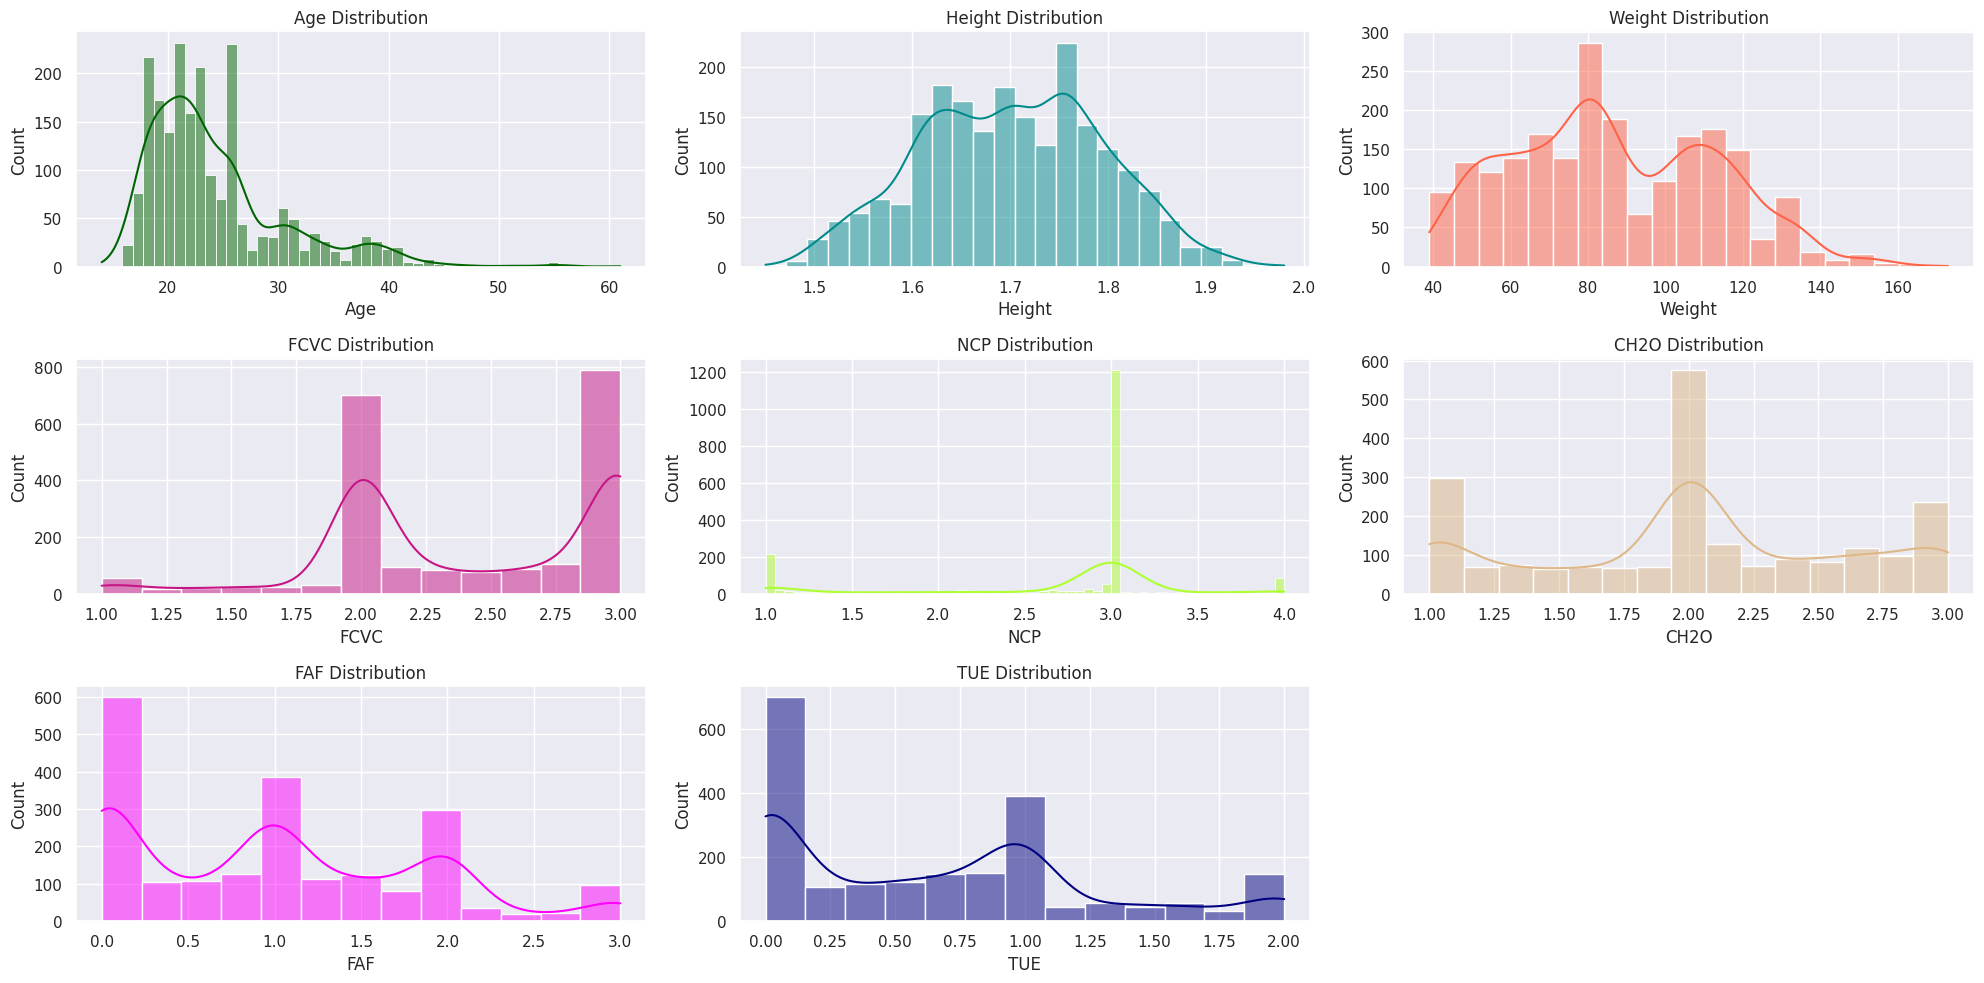

In [66]:
plt.figure(figsize=(20,10))
colors=['darkgreen','darkcyan','tomato','mediumvioletred','greenyellow','burlywood','fuchsia','navy']
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df,x=col,kde=True,color=colors[i])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()


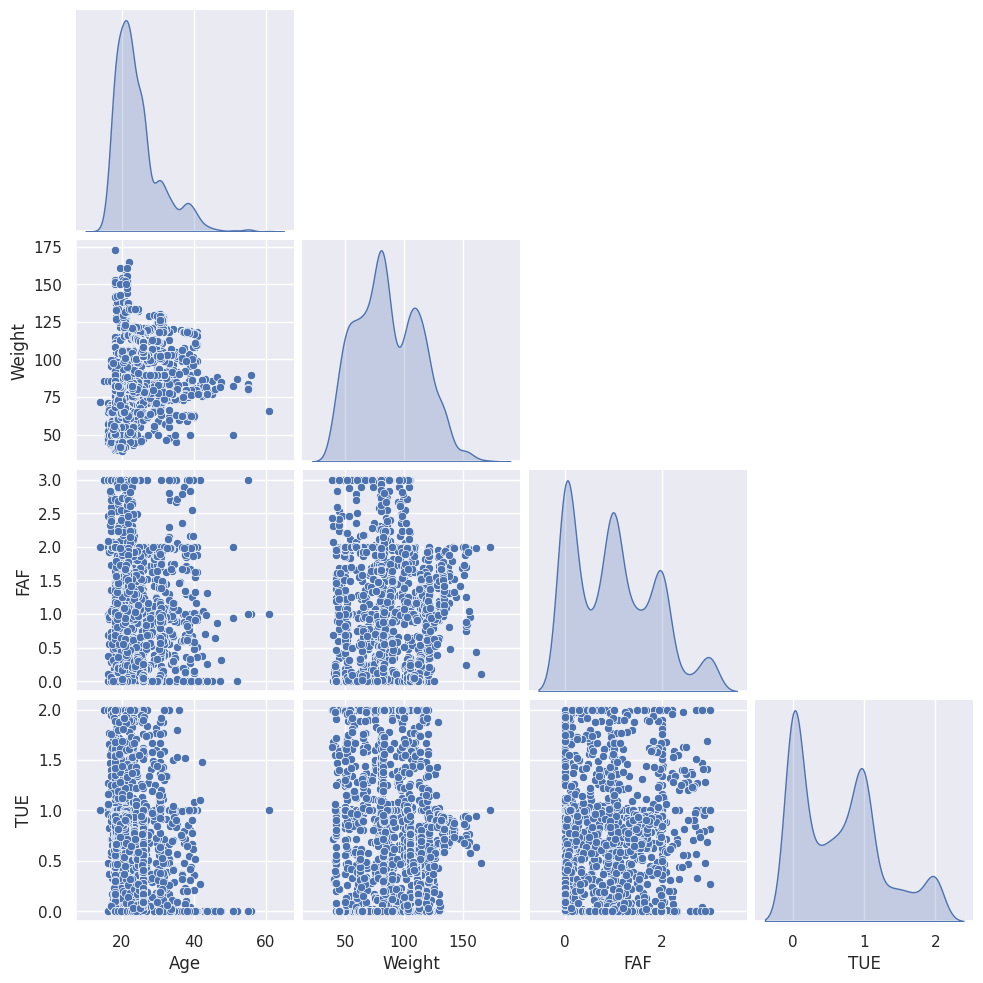

In [67]:
pairplot_cols = ['Age', 'Weight', 'FAF', 'TUE']
sns.pairplot(
    data=df,
    vars=pairplot_cols,
    diag_kind='kde',
    corner = True,
)
plt.show()

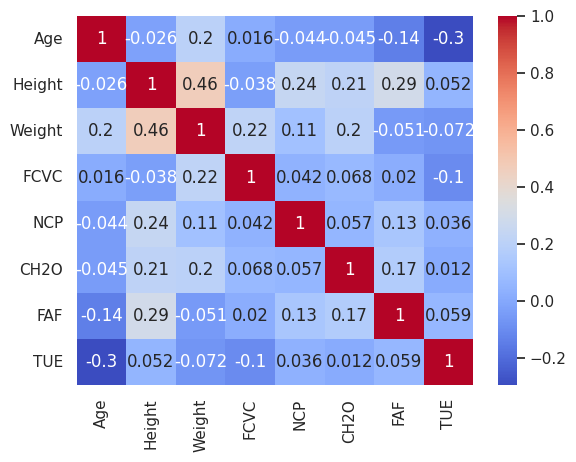

In [68]:
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

In [69]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [70]:
Y_Ncols = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']

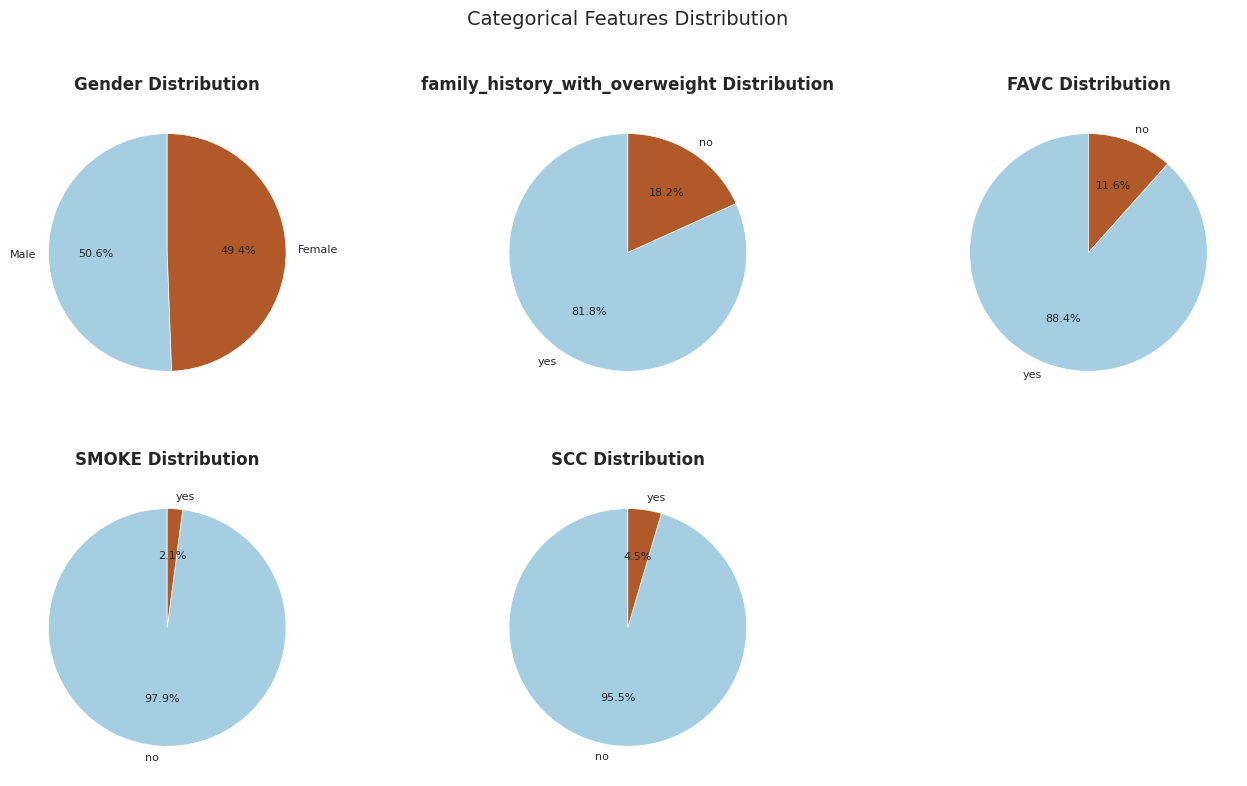

In [71]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(Y_Ncols):
    plt.subplot(2, 3, i+1)


    counts = df[col].value_counts()
    labels = counts.index


    colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))


    wedges, texts, autotexts = plt.pie(
        counts,
        labels=labels,
        colors=colors,
        autopct='%.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
        textprops={'fontsize': 8}
    )


    plt.title(f'{col} Distribution', pad=10, fontweight='bold')
    plt.tight_layout(pad=3.0)

plt.suptitle('Categorical Features Distribution', y=1.02, fontsize=14)
plt.show()


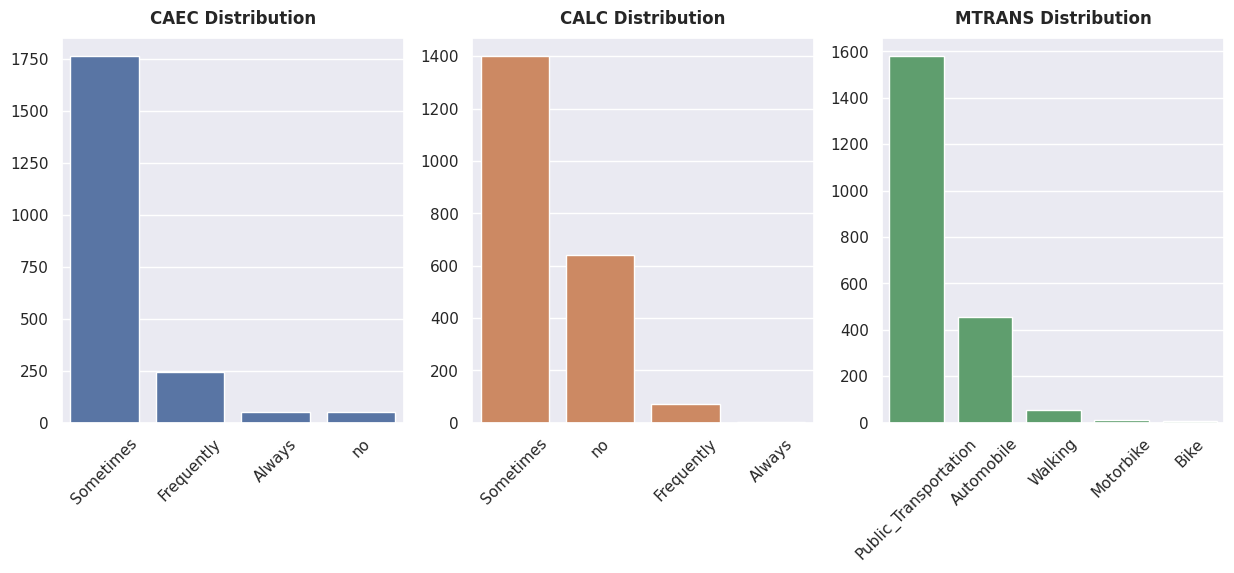

In [72]:
Obj_cols = ['CAEC','CALC','MTRANS']
plt.figure(figsize=(15,5))
for i,col in enumerate(Obj_cols):
    plt.subplot(1,3,i+1)
    value_counts = df[col].value_counts()


    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        color=f'C{i}'  # Uses matplotlib default color cycle
    )

    plt.title(f'{col} Distribution', pad=10, fontweight='bold')
    plt.xlabel('')
    plt.xticks(rotation=45)

# Feature Engineeering

In [73]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [74]:
from sklearn.preprocessing import OrdinalEncoder

In [75]:
df_copy = df.copy()

In [76]:
On = OrdinalEncoder()
df_copy[object_cols] = On.fit_transform(df[object_cols])

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sd = StandardScaler()

In [79]:
scaled_df = sd.fit_transform(df_copy)

In [80]:
data = scaled_df

# Applying PCA

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

In [83]:
data_2d.shape

(2111, 2)

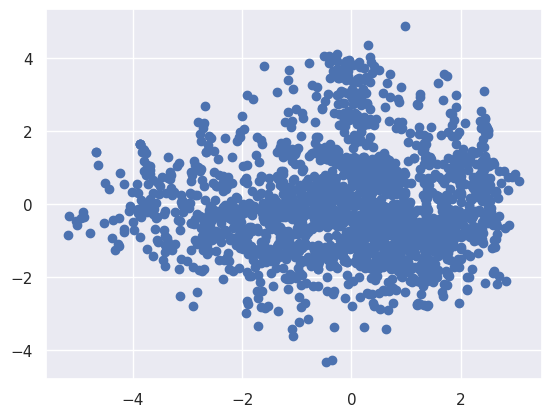

In [84]:
plt.scatter(x=data_2d[:,0],y=data_2d[:,1])

In [85]:
pca2 = PCA(.95)
reduce_data = pca2.fit_transform(data)

In [86]:
reduce_data.shape

(2111, 14)

# Applying KMeans

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [88]:
WCSS = []
sil_csore = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    clus = kmeans.fit_predict(reduce_data)
    WCSS.append(kmeans.inertia_)
    score = silhouette_score(reduce_data,clus)
    sil_csore.append(score)

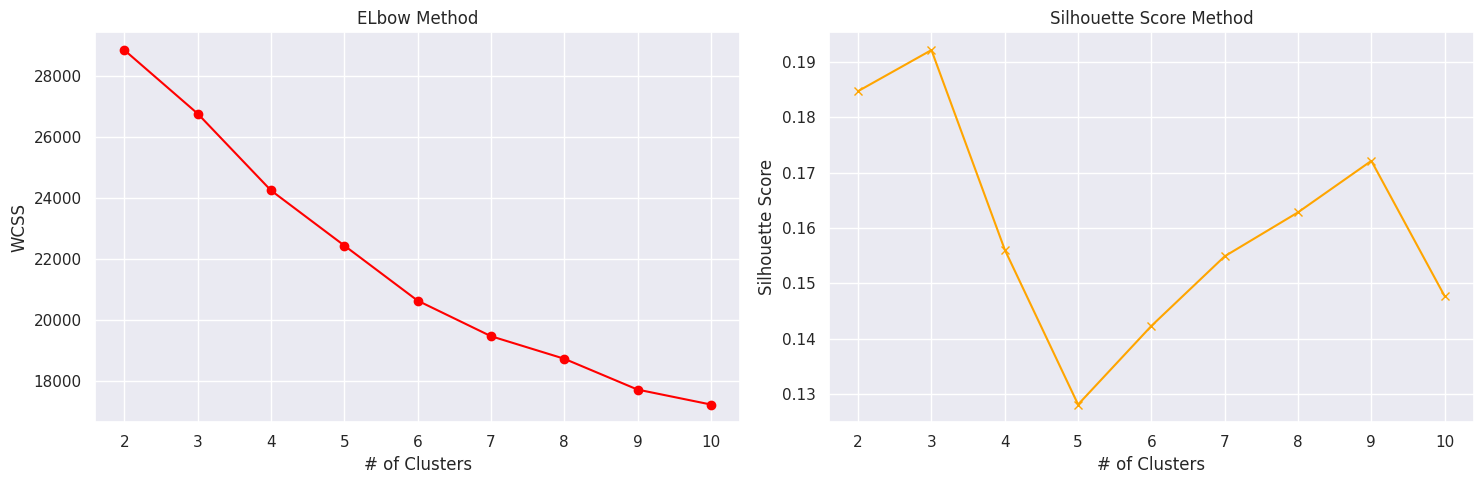

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(2,11),WCSS,marker='o',c='red')
plt.ylabel('WCSS')
plt.xlabel('# of Clusters')
plt.title('ELbow Method')

plt.subplot(1,2,2)
plt.plot(range(2,11),sil_csore,marker='x',c='orange')
plt.ylabel('Silhouette Score')
plt.xlabel('# of Clusters')
plt.title('Silhouette Score Method')


plt.tight_layout()
plt.show()

In [90]:
kmean_3 = KMeans(n_clusters=3,init='k-means++',random_state=42)
clusters3 = kmean_3.fit_predict(reduce_data)

## 3 Clusters are good but so general we need more specific values so we will choose 9

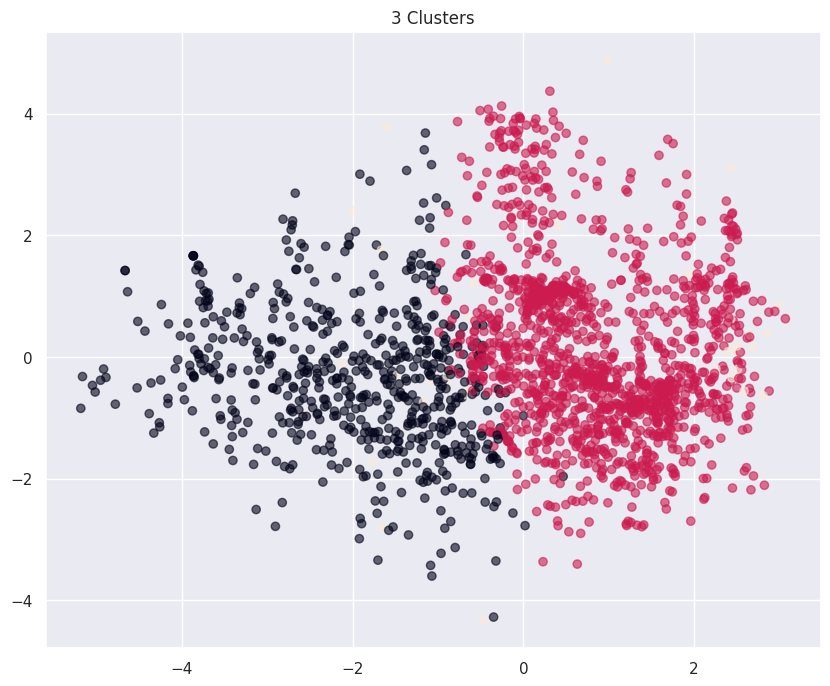

In [91]:
plt.figure(figsize=(10,8))
plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=clusters3,alpha=0.6)
plt.title('3 Clusters')
plt.show()

In [92]:
kmean_9 = KMeans(n_clusters=9,init='k-means++',random_state=42)
clusters9 = kmean_9.fit_predict(reduce_data)

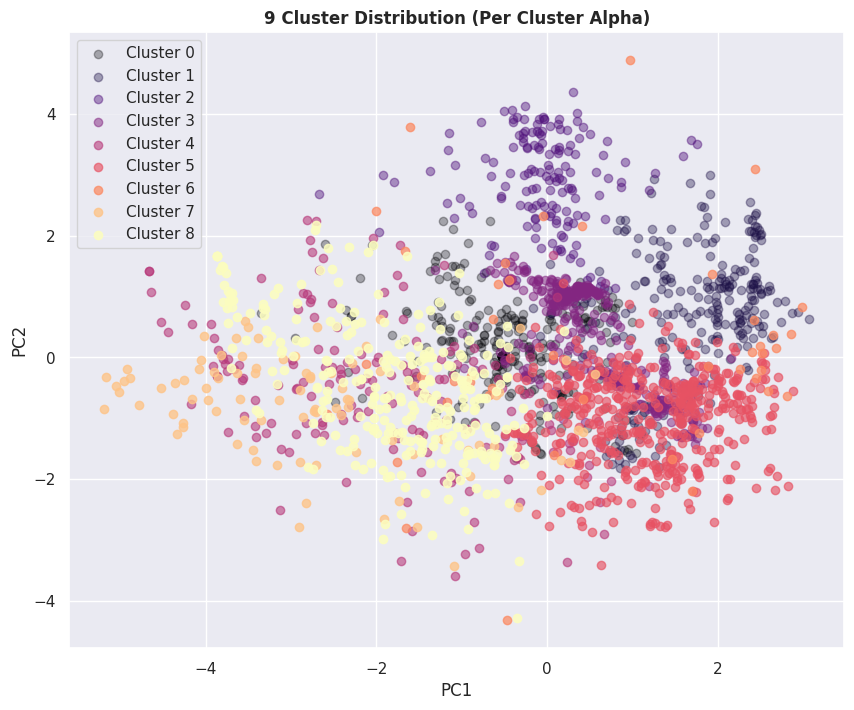

In [93]:
plt.figure(figsize=(10,8))

n_clusters = len(np.unique(clusters9))
colors = plt.cm.get_cmap('magma', n_clusters)

for i in range(n_clusters):
    cluster_points = data_2d[clusters9 == i]
    plt.scatter(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        alpha=0.3 + 0.07 * i,
        color=colors(i),
        label=f'Cluster {i}'
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('9 Cluster Distribution (Per Cluster Alpha)', fontweight='bold')
plt.legend()
plt.show()


# Applying DBSCAN

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

min_samples_range = range(5, 21)
eps_range = np.arange(0.3, .9, 0.1)

best_result = {'score': -1, 'min_samples': None, 'eps': None}

for min_samples in min_samples_range:
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(data, labels)
            if score > best_result['score']:
                best_result = {
                    'score': score,
                    'min_samples': min_samples,
                    'eps': eps,
                    'n_clusters': n_clusters
                }

print("Best DBSCAN config:")
print(best_result)

Best DBSCAN config:
{'score': np.float64(-0.05155485554653751), 'min_samples': 19, 'eps': np.float64(0.8000000000000003), 'n_clusters': 3}


### Based on the result
DBSCAN is not suited for this dataset

In [95]:
clusters9

array([4, 6, 4, ..., 3, 3, 3], dtype=int32)

In [96]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [97]:
df['Clusters'] = clusters9

In [98]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Clusters
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,6
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,4
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,4
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,4


In [99]:
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

In [100]:
cluster_sum_num = df.groupby(by = 'Clusters')[numerical_cols].mean()
cluster_sum_num

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Clusters
Clusters,,,,,,,,,
0,22.647954,1.656655,82.866703,2.309018,1.629349,1.948933,0.953587,0.711435,0.0
1,29.876423,1.770893,94.263415,2.325578,2.871568,2.082581,1.219634,0.563550,1.0
2,37.069749,1.621707,75.564294,2.399769,2.517283,1.711492,0.600231,0.280845,2.0
3,23.238594,1.685403,116.272388,2.939675,3.001649,2.207934,0.681014,0.610882,3.0
4,21.438435,1.649423,65.791303,2.366159,2.635201,1.937063,1.205232,0.596859,4.0
5,22.630745,1.779734,95.955380,2.192479,2.891967,2.173360,1.143153,0.729065,5.0
6,28.312669,1.737161,91.206810,2.471433,2.727273,1.873628,1.075671,0.731358,6.0
7,20.467392,1.643994,61.900903,2.594475,2.631595,1.999287,1.282949,0.639880,7.0
8,20.317224,1.652888,55.112839,2.315543,2.840955,1.681556,1.059569,0.874049,8.0


In [101]:
cluster_summary_cat = df.groupby('Clusters')[categorical_cols].agg(lambda x: x.value_counts().index[0])
cluster_summary_cat

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
Clusters,,,,,,,,
0,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
1,Male,yes,yes,Sometimes,no,no,Sometimes,Automobile
2,Female,yes,yes,Sometimes,no,no,Sometimes,Automobile
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Female,yes,no,Sometimes,no,no,no,Public_Transportation
5,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
6,Male,yes,yes,Sometimes,yes,no,Sometimes,Public_Transportation
7,Female,no,yes,Sometimes,no,yes,Sometimes,Public_Transportation
8,Female,no,yes,Sometimes,no,no,Sometimes,Public_Transportation


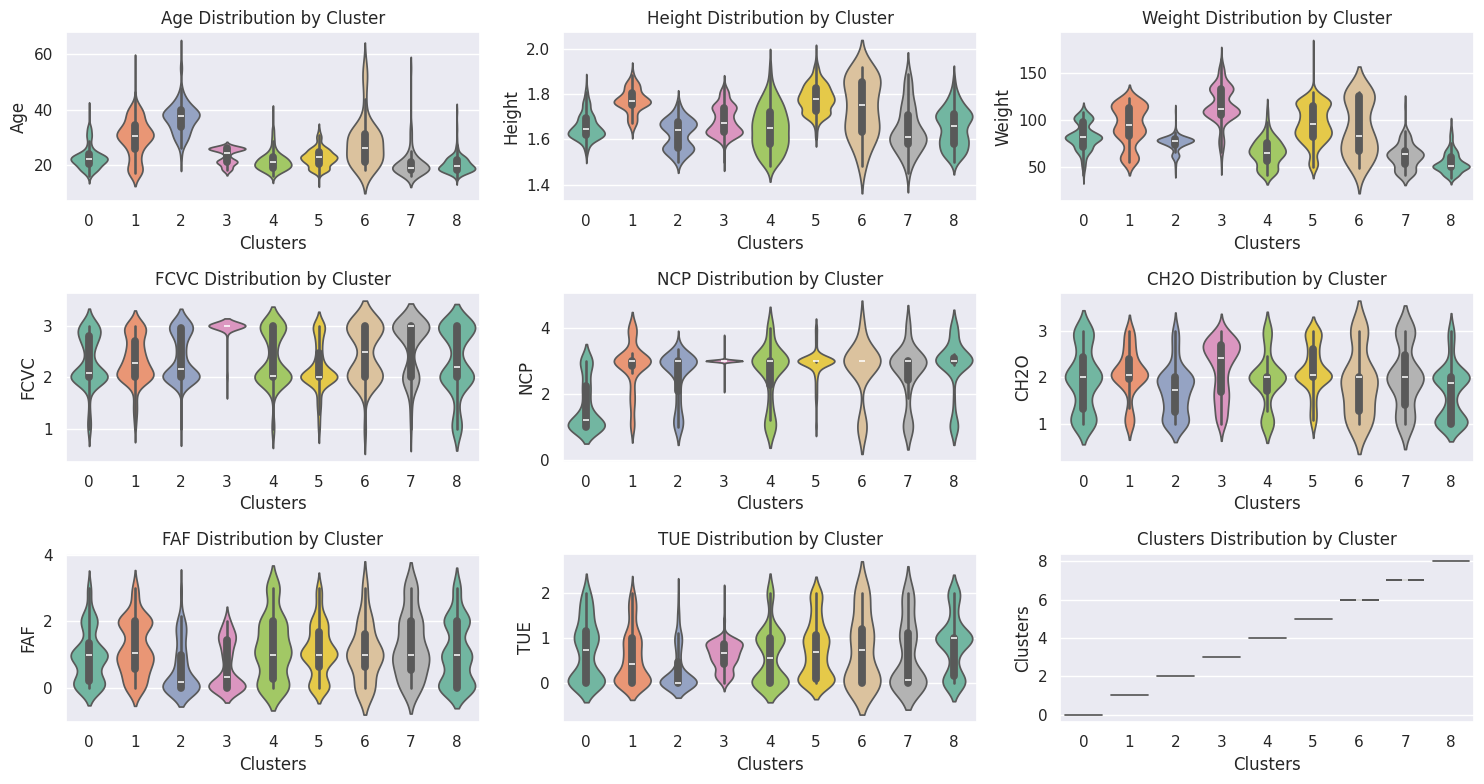

In [102]:
plt.figure(figsize=(15, 8))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.violinplot(x='Clusters', y=col, data=df, inner='box', palette='Set2',hue=None)
    plt.title(f'{col} Distribution by Cluster')



plt.tight_layout()
plt.show()

In [103]:
df_copy['Clusters'] = clusters9

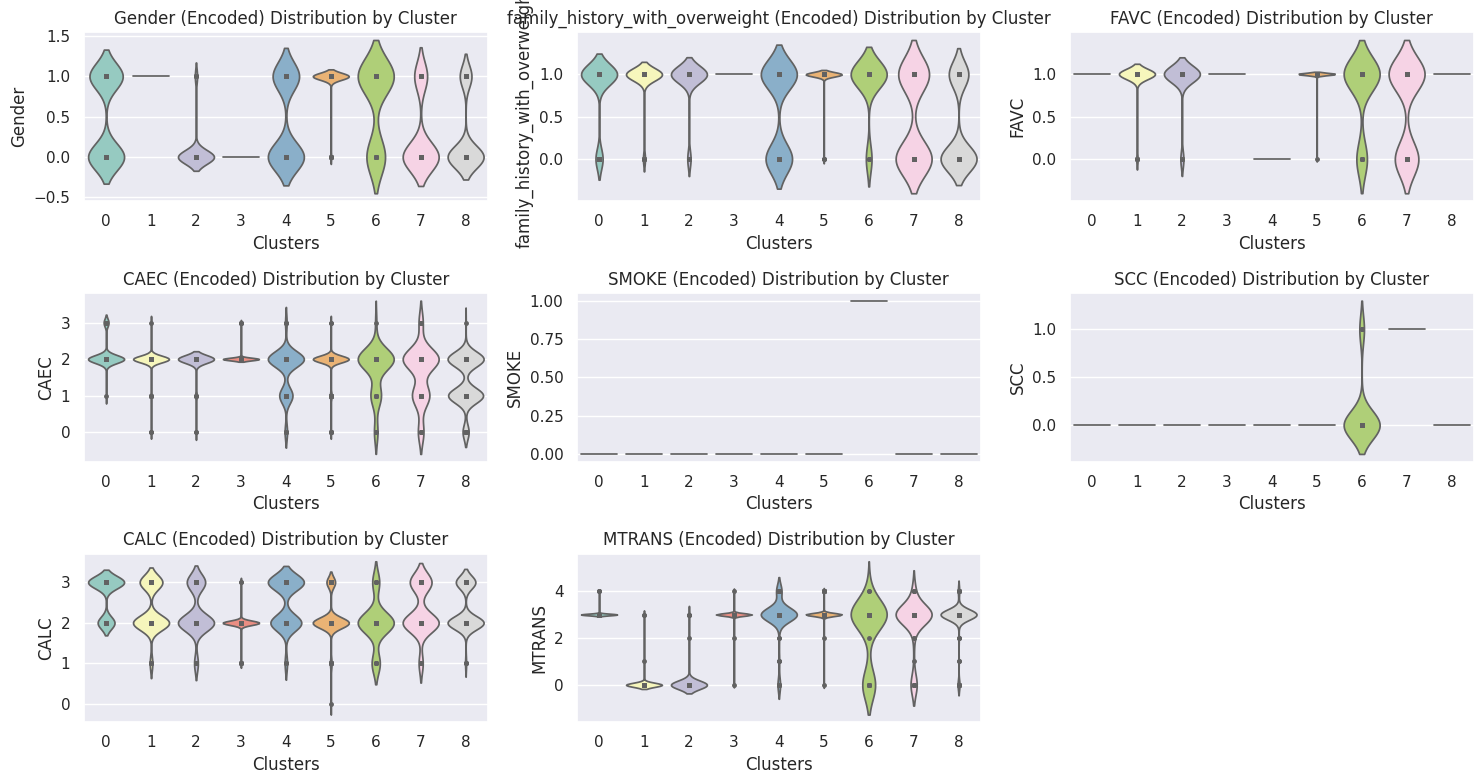

In [104]:
plt.figure(figsize=(15, 8))

for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.violinplot(x='Clusters', y=col, data=df_copy, inner='point', palette='Set3')
    plt.title(f'{col} (Encoded) Distribution by Cluster')


plt.tight_layout()
plt.show()


In [105]:
stop_time = time.time()

print(f"time used {((stop_time-start_time)/60):.2f} minutes")

time used 0.54 minutes


# 🧩 Cluster Analysis Summary

Based on the violin plots for both **numerical** and **categorical** features, each cluster has been analyzed and labeled according to the behavior and patterns observed in the data.

---

## 🏷️ Cluster Names & Descriptions

### **Cluster 0** – 🧘‍♂️ *Healthy & Active Young Adults*
- Low **Age**, moderate **Weight**
- High **Vegetable Consumption (FCVC)**, moderate **Physical Activity (FAF)**
- Balanced **CH2O** (water intake) and **NCP** (meal count)
- Mostly **non-smokers**, low **SCC** (calorie monitoring)
- ➤ **Profile**: Health-conscious and active individuals, likely in their 20s.

---

### **Cluster 1** – 🍔 *Unhealthy Eaters*
- Medium **Age**, high **Weight**, shorter **Height**
- High **Meal Count (NCP)**, low **Vegetable Intake**
- Moderate **FAF**, low **TUE** (screen time)
- Common **Family History** of overweight
- ➤ **Profile**: High food intake with poor balance, potentially leading to obesity.

---

### **Cluster 2** – 👶 *Teen Group*
- Youngest group
- Low **Weight** and **Height**
- Low **FAF** and moderate **NCP**
- ➤ **Profile**: Likely teenagers or students with developing habits.

---

### **Cluster 3** – 🍩 *Obese & Sedentary*
- High **Weight**, low **Activity**, high **Screen Time**
- Low **FCVC**, high **CH2O**
- **Family history** present
- ➤ **Profile**: At-risk group with sedentary lifestyle and poor diet.

---

### **Cluster 4** – 🍱 *Controlled Dieters*
- Balanced in most metrics
- High **Vegetable Consumption**, moderate physical activity
- Average **TUE**, **NCP**, and **CH2O**
- ➤ **Profile**: Individuals focused on maintaining or reducing weight through diet.

---

### **Cluster 5** – 🏋️‍♂️ *Fit & Tall Adults*
- Tallest group
- High **FCVC**, moderate **NCP**
- Active lifestyle (**FAF**), average **TUE**
- ➤ **Profile**: Possibly athletes or fitness-oriented individuals.

---

### **Cluster 6** – 📺 *Screen-time Heavy*
- High **Screen Time (TUE)**, low **Physical Activity**
- Moderate meal and water intake
- High **SCC** – these people track calories!
- ➤ **Profile**: Sedentary jobs, health-aware (e.g., office workers).

---

### **Cluster 7** – 🚬 *Smokers & High Weight*
- High **Weight**, low **Activity**
- Spikes in **Smoking**
- Spread in **CH2O** and **CAEC** (eating outside)
- ➤ **Profile**: Unhealthy group with smoking habits and risk of obesity.

---

### **Cluster 8** – 👵 *Elderly or Retired Lifestyle*
- High **Age**, low **Weight**, short **Height**
- Low **FAF** and **FCVC**
- ➤ **Profile**: Older individuals with less mobility or retired lifestyle.

---

## 📊 Summary Table

| Cluster | Label                         | Description                         |
|---------|-------------------------------|-------------------------------------|
| 0       | 🧘‍♂️ Healthy & Active Young Adults | Balanced diet, moderate activity    |
| 1       | 🍔 Unhealthy Eaters           | Overeating, low veggies             |
| 2       | 👶 Teen Group                 | Young, developing habits            |
| 3       | 🍩 Obese & Sedentary          | At-risk group, high screen time     |
| 4       | 🍱 Controlled Dieters         | Watching food intake carefully      |
| 5       | 🏋️‍♂️ Fit & Tall Adults         | Physically active and taller        |
| 6       | 📺 Screen-time Heavy          | Sedentary but health-aware          |
| 7       | 🚬 Smokers & High Weight      | Risk group: smoking + inactivity    |
| 8       | 👵 Elderly or Retired         | Older people with low mobility      |
